<a href="https://colab.research.google.com/github/badhan7700/Traffic-Sign-Recognition-Web-App/blob/main/TrafficSignRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GTSRB Traffic Sign Classification
**Simple CNN + MobileNetV2 Transfer Learning**

This notebook trains two models:
1. Simple CNN (from scratch)
2. MobileNetV2 (transfer learning)

---

## Part 1: Setup & Data Loading

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Imports
import os
import pickle
import random
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from sklearn.metrics import confusion_matrix, classification_report
from PIL import Image

# Set seeds for reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

print(f'TensorFlow: {tf.__version__}')

TensorFlow: 2.19.0


In [ ]:
# Load Dataset
BASE_PATH = '/content/drive/MyDrive/TrafficSignProject/GTSRB'

def load_data(path):
    with open(path, 'rb') as f:
        data = pickle.load(f)
    return np.array(data['features']), np.array(data['labels'])

X_train, y_train = load_data(f'{BASE_PATH}/train.p')
X_valid, y_valid = load_data(f'{BASE_PATH}/valid.p')
X_test, y_test = load_data(f'{BASE_PATH}/test.p')

# Load class names
df_signs = pd.read_csv(f'{BASE_PATH}/signname.csv')
NUM_CLASSES = len(df_signs)
sign_names = dict(zip(df_signs.ClassId, df_signs.SignName))

print(f'Classes: {NUM_CLASSES}')
print(f'Train: {X_train.shape}, Valid: {X_valid.shape}, Test: {X_test.shape}')

Classes: 43
Train: (34799, 32, 32, 3), Valid: (4410, 32, 32, 3), Test: (12630, 32, 32, 3)


In [ ]:
# Preprocessing - Normalize to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_valid = X_valid.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode labels
y_train_oh = to_categorical(y_train, NUM_CLASSES)
y_valid_oh = to_categorical(y_valid, NUM_CLASSES)
y_test_oh = to_categorical(y_test, NUM_CLASSES)

print(f'Data range: [{X_train.min():.1f}, {X_train.max():.1f}]')

Data range: [0.0, 1.0]


## Part 2: Data Visualization

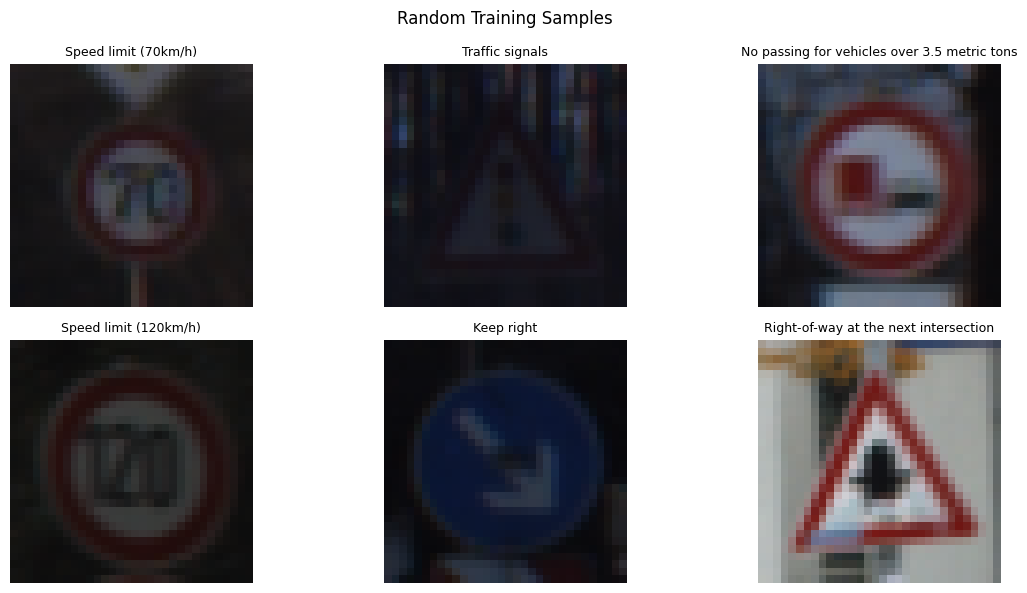

In [ ]:
# Show random samples
plt.figure(figsize=(12, 6))
for i in range(6):
    idx = random.randint(0, len(X_train)-1)
    plt.subplot(2, 3, i+1)
    plt.imshow(X_train[idx])
    plt.title(sign_names[y_train[idx]], fontsize=9)
    plt.axis('off')
plt.suptitle('Random Training Samples')
plt.tight_layout()
plt.show()